# Python数据分析练习

这个notebook展示了使用Python进行数据分析的基本操作，包括：
1. 数据加载
2. 数据基本查看
3. 数据处理示例
4. 数据可视化示例

In [1]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

## 1. 数据加载
首先加载我们的测试数据文件

In [14]:
# 读取销售数据
sales_df = pd.read_csv('data/sales.csv')

# 读取学生数据
students_df = pd.read_csv('data/students.xlsx')

# 读取JSON数据
with open('data/products.json', 'r') as f:
    products_json = json.load(f)

## 2. 数据基本查看

In [15]:
# 查看销售数据基本信息
print("销售数据基本信息：")
print(sales_df.info())
print("\n销售数据前5行：")
display(sales_df.head())

# 查看学生数据基本信息
print("\n学生数据基本信息：")
print(students_df.info())
print("\n学生数据前5行：")
display(students_df.head())

销售数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6 non-null      object 
 1   Product   6 non-null      object 
 2   Quantity  6 non-null      int64  
 3   Price     6 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 324.0+ bytes
None

销售数据前5行：


,Date,Product,Quantity,Price
0,2025-01-01,Laptop,5,999.99
1,2025-01-02,Mouse,10,29.99
2,2025-01-02,Keyboard,8,89.99
3,2025-01-03,Monitor,3,299.99
4,2025-01-03,Laptop,2,999.99



学生数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student ID  5 non-null      int64 
 1   Name        5 non-null      object
 2   Math        5 non-null      int64 
 3   English     5 non-null      int64 
 4   Science     5 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 332.0+ bytes
None

学生数据前5行：


,Student ID,Name,Math,English,Science
0,1001,张三,85,92,88
1,1002,李四,92,78,95
2,1003,王五,78,85,80
3,1004,赵六,90,88,92
4,1005,孙七,95,90,89


## 3. 数据处理示例

In [16]:
# 销售数据分析
print("每个产品的总销售额：")
sales_summary = sales_df.groupby('Product').agg({
    'Quantity': 'sum',
    'Price': 'mean'
}).assign(Total_Revenue=lambda x: x['Quantity'] * x['Price'])
display(sales_summary)

# 学生成绩分析
print("\n学生成绩统计：")
students_stats = students_df[['Math', 'English', 'Science']].describe()
display(students_stats)

每个产品的总销售额：


,Quantity,Price,Total_Revenue
Product,,,
Keyboard,8,89.99,719.92
Laptop,7,999.99,6999.93
Monitor,3,299.99,899.97
Mouse,25,29.99,749.75



学生成绩统计：


,Math,English,Science
count,5.000000,5.000000,5.000000
mean,88.000000,86.600000,88.800000
std,6.670832,5.458938,5.630275
min,78.000000,78.000000,80.000000
25%,85.000000,85.000000,88.000000
50%,90.000000,88.000000,89.000000
75%,92.000000,90.000000,92.000000
max,95.000000,92.000000,95.000000


## 4. 数据可视化示例

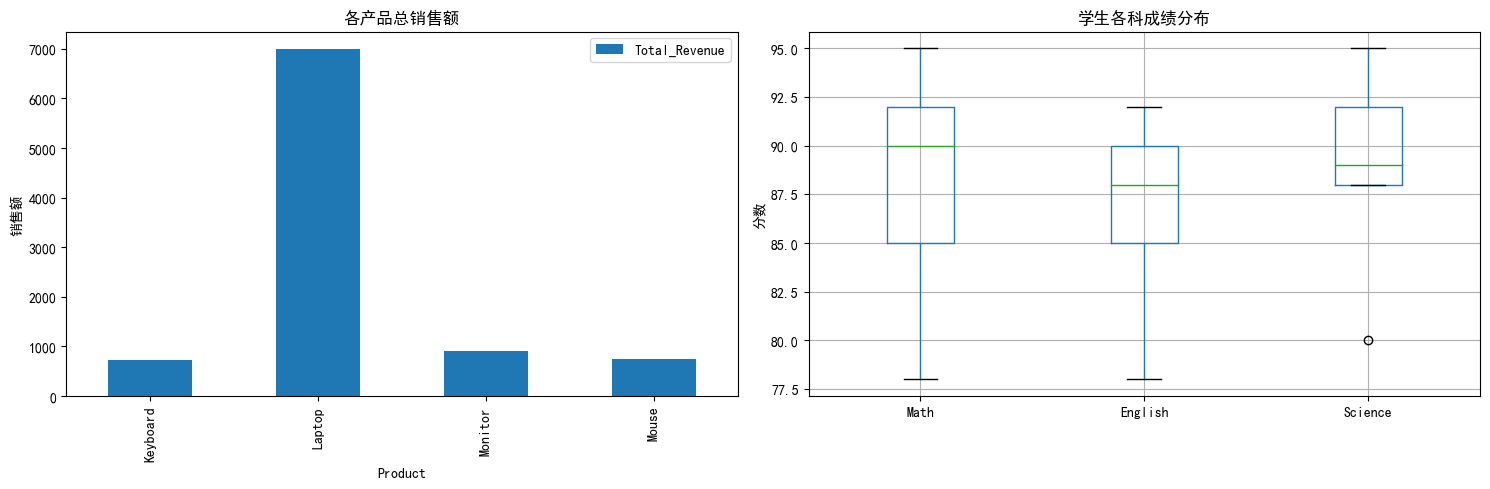

In [17]:
# 创建一个图形，包含两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 销售数据可视化
sales_summary.plot(y='Total_Revenue', kind='bar', ax=ax1)
ax1.set_title('各产品总销售额')
ax1.set_ylabel('销售额')

# 学生成绩箱型图
students_df[['Math', 'English', 'Science']].boxplot(ax=ax2)
ax2.set_title('学生各科成绩分布')
ax2.set_ylabel('分数')

plt.tight_layout()
plt.show()

## 5. 练习建议

你可以尝试以下练习：

1. 数据处理：
   - 计算每日总销售额
   - 找出销售量最高的产品
   - 计算学生的平均成绩并排名

2. 数据可视化：
   - 绘制销售趋势图
   - 创建成绩分布直方图
   - 使用散点图分析不同科目之间的相关性

3. 数据导出：
   - 将处理后的数据保存为不同格式
   - 尝试数据格式之间的转换

In [21]:
sales2 = pd.read_csv('data/sales2.csv',names=['a','b','c','d'], index_col='d')
sales2.head() 

,a,b,c
d,,,
999.99,2025-01-01,Laptop,5
29.99,2025-01-02,Mouse,10
89.99,2025-01-02,Keyboard,8
299.99,2025-01-03,Monitor,3
999.99,2025-01-03,Laptop,2


In [20]:
sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      object 
 1   b       6 non-null      object 
 2   c       6 non-null      int64  
 3   d       6 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 324.0+ bytes


In [23]:
key_value = pd.read_csv('data/key_value.csv', index_col=['key1','key2'])
key_value.head()

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10

In [24]:
df = pd.read_csv('data/sales_missing.csv')
df.head()

,Date,Product,Category,Quantity,Price,Customer,Region,Payment
0,2025-01-01,Laptop,Electronics,5.0,999.99,John Smith,North,Credit Card
1,2025-01-02,Mouse,Accessories,NaN,29.99,Mary Johnson,South,NaN
2,2025-01-02,Keyboard,Accessories,8.0,NaN,Peter Wang,East,Cash
3,2025-01-03,NaN,Electronics,3.0,299.99,NaN,North,Credit Card
4,2025-01-03,Laptop,Electronics,0.0,999.99,Sarah Brown,NaN,Debit Card


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11 non-null     object 
 1   Product   10 non-null     object 
 2   Category  10 non-null     object 
 3   Quantity  9 non-null      float64
 4   Price     10 non-null     float64
 5   Customer  9 non-null      object 
 6   Region    9 non-null      object 
 7   Payment   8 non-null      object 
dtypes: float64(2), object(6)
memory usage: 900.0+ bytes


In [28]:
pd.isnull(df)

,Date,Product,Category,Quantity,Price,Customer,Region,Payment
0,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,True
2,False,False,False,False,True,False,False,False
3,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False
5,False,False,False,False,False,False,False,True
6,True,False,False,False,False,False,False,False
7,False,False,True,False,True,False,False,False
8,False,False,False,False,False,True,True,False
9,False,False,False,False,False,False,False,True


In [29]:
df = pd.read_csv('data/sales_missing.csv', na_values=['NA', 'N/A', 'NaN'])
df.head()

,Date,Product,Category,Quantity,Price,Customer,Region,Payment
0,2025-01-01,Laptop,Electronics,5.0,999.99,John Smith,North,Credit Card
1,2025-01-02,Mouse,Accessories,NaN,29.99,Mary Johnson,South,NaN
2,2025-01-02,Keyboard,Accessories,8.0,NaN,Peter Wang,East,Cash
3,2025-01-03,NaN,Electronics,3.0,299.99,NaN,North,Credit Card
4,2025-01-03,Laptop,Electronics,0.0,999.99,Sarah Brown,NaN,Debit Card


In [30]:
df.to_csv('data/out.csv')

In [32]:
import  sys
df.to_csv(sys.stdout, sep='|')

|Date|Product|Category|Quantity|Price|Customer|Region|Payment
0|2025-01-01|Laptop|Electronics|5.0|999.99|John Smith|North|Credit Card
1|2025-01-02|Mouse|Accessories||29.99|Mary Johnson|South|
2|2025-01-02|Keyboard|Accessories|8.0||Peter Wang|East|Cash
3|2025-01-03||Electronics|3.0|299.99||North|Credit Card
4|2025-01-03|Laptop|Electronics|0.0|999.99|Sarah Brown||Debit Card
5|2025-01-04|Mouse|Accessories|15.0|29.99|David Miller|West|
6||Monitor|Electronics|2.0|399.99|Lisa Chen|South|Credit Card
7|2025-01-05|Printer||4.0||Tom Wilson|East|Cash
8|2025-01-05|Keyboard|Accessories|-1.0|89.99|||PayPal
9|2025-01-06|Mouse|Accessories|12.0|29.99|Emma Davis|West|
10|2025-01-06||||199.99|James Lee|North|Credit Card
11|2025-01-07|Laptop|Electronics||999.99|||


In [33]:
df.to_csv(sys.stdout,na_rep='NULL')

,Date,Product,Category,Quantity,Price,Customer,Region,Payment
0,2025-01-01,Laptop,Electronics,5.0,999.99,John Smith,North,Credit Card
1,2025-01-02,Mouse,Accessories,NULL,29.99,Mary Johnson,South,NULL
2,2025-01-02,Keyboard,Accessories,8.0,NULL,Peter Wang,East,Cash
3,2025-01-03,NULL,Electronics,3.0,299.99,NULL,North,Credit Card
4,2025-01-03,Laptop,Electronics,0.0,999.99,Sarah Brown,NULL,Debit Card
5,2025-01-04,Mouse,Accessories,15.0,29.99,David Miller,West,NULL
6,NULL,Monitor,Electronics,2.0,399.99,Lisa Chen,South,Credit Card
7,2025-01-05,Printer,NULL,4.0,NULL,Tom Wilson,East,Cash
8,2025-01-05,Keyboard,Accessories,-1.0,89.99,NULL,NULL,PayPal
9,2025-01-06,Mouse,Accessories,12.0,29.99,Emma Davis,West,NULL
10,2025-01-06,NULL,NULL,NULL,199.99,James Lee,North,Credit Card
11,2025-01-07,Laptop,Electronics,NULL,999.99,NULL,NULL,NULL


In [34]:
df.to_csv(sys.stdout, index=False, header=False)

2025-01-01,Laptop,Electronics,5.0,999.99,John Smith,North,Credit Card
2025-01-02,Mouse,Accessories,,29.99,Mary Johnson,South,
2025-01-02,Keyboard,Accessories,8.0,,Peter Wang,East,Cash
2025-01-03,,Electronics,3.0,299.99,,North,Credit Card
2025-01-03,Laptop,Electronics,0.0,999.99,Sarah Brown,,Debit Card
2025-01-04,Mouse,Accessories,15.0,29.99,David Miller,West,
,Monitor,Electronics,2.0,399.99,Lisa Chen,South,Credit Card
2025-01-05,Printer,,4.0,,Tom Wilson,East,Cash
2025-01-05,Keyboard,Accessories,-1.0,89.99,,,PayPal
2025-01-06,Mouse,Accessories,12.0,29.99,Emma Davis,West,
2025-01-06,,,,199.99,James Lee,North,Credit Card
2025-01-07,Laptop,Electronics,,999.99,,,


In [38]:
dataes = pd.date_range('1/1/2000', periods=10, freq='D')
ts = pd.Series(np.arange(10), index=dataes)
ts.head()

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int32

In [39]:
import json
result = json.load(open('data/products.json'))
result

{'products': [{'id': 'P001',
   'name': 'Gaming Laptop',
   'category': 'Electronics',
   'price': 1299.99,
   'stock': 50},
  {'id': 'P002',
   'name': 'Wireless Mouse',
   'category': 'Accessories',
   'price': 39.99,
   'stock': 200},
  {'id': 'P003',
   'name': 'Mechanical Keyboard',
   'category': 'Accessories',
   'price': 129.99,
   'stock': 100}]}

In [40]:
asjson = json.dumps(result)
asjson

'{"products": [{"id": "P001", "name": "Gaming Laptop", "category": "Electronics", "price": 1299.99, "stock": 50}, {"id": "P002", "name": "Wireless Mouse", "category": "Accessories", "price": 39.99, "stock": 200}, {"id": "P003", "name": "Mechanical Keyboard", "category": "Accessories", "price": 129.99, "stock": 100}]}'

In [41]:
df = pd.read_json('data/products.json')
df.head()

,products
0,"{'id': 'P001', 'name': 'Gaming Laptop', 'categ..."
1,"{'id': 'P002', 'name': 'Wireless Mouse', 'cate..."
2,"{'id': 'P003', 'name': 'Mechanical Keyboard', ..."
